In [151]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 
import pyfpgrowth
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [109]:
df = pd.read_csv('data_alles_nieuw.csv', encoding='utf8')


In [110]:
df.columns

Index(['Behkn', 'Branch (Neven2)', 'Branch (Neven1)',
       'Branch (Hoofdactiviteit)', 'CBS', 'C HOOFDACT (SBI)',
       'Code Hoofd activiteit', 'Gebruiksdoel groepering',
       'Vreemd gebruiksdoel', 'Expediteurs', 'Expediteurs in onderzoek',
       'Geregistreerd in Fenex', 'Code (KWP)', 'Code (Neven 1)',
       'Code (Neven2)', 'Code (Hoofdactiviteit)', 'Code', 'DOSSIER (SBI)',
       'KVK-nummer', 'Gemeentenummer corespondentie',
       'Gemeentenummer vestiging', 'Gemeentenaam', 'Geokn', 'Gemeente',
       'Geregistreerd in Niwo', 'Hoofdvestiging  of nevevesting',
       'Organisatienaam', 'Huisnummer corospendentie', 'Huisnummer vestiging',
       'Ind Im Exp', 'Kamers Van Koophandel', 'Klasse Werkzame Personen',
       'KvK NR.(wat houdt dit in?)', 'NEVEN1 (SBI)', 'Neven activiteit 1',
       'NEVEN2 (SBI)', 'Neven actviteit 2', 'Non Mailing Indicator',
       'Number of Records', 'Postcode corespondentie 2',
       'Postcode plaats corespondentie', 'Postcode plaats vestigin

In [111]:
cluster_df = df[['Hoofdactiviteit beschrijving (uit KVK-dataset)', 'Geregistreerd in Fenex', 'Oppervlakte', 'Emp Class', 'Kadaster inOnderzoek', 'Gebruiksdoel', 'Verblijfsobject status', 'Registration Date in KVK', 'Geregistreerd in Niwo']]

In [112]:
cluster_df['Geregistreerd in Niwo'].value_counts()

Nee    6129
Ja      400
Name: Geregistreerd in Niwo, dtype: int64

In [113]:
cluster_df.head()

,Hoofdactiviteit beschrijving (uit KVK-dataset),Geregistreerd in Fenex,Oppervlakte,Emp Class,Kadaster inOnderzoek,Gebruiksdoel,Verblijfsobject status,Registration Date in KVK,Geregistreerd in Niwo
0,Goederenvervoer over weg (geen verhuiz.),Nee,503.0,6.0,False,kantoorfunctie,in gebruik,9/1/1981,Ja
1,Expediteurs/cargadoors/bevrachters e.d.,Nee,261.0,4.0,False,woonfunctie,in gebruik (niet ingemeten),6/6/1988,Nee
2,GH ijzer-/staalschroot/oude non.ferrom.,Nee,96.0,3.0,False,industriefunctie,in gebruik,10/21/1982,Nee
3,Expediteurs/cargadoors/bevrachters e.d.,Nee,1818.0,8.0,False,kantoorfunctie,in gebruik,1/8/1990,Nee
4,Goederenvervoer over weg (geen verhuiz.),Nee,760.0,6.0,False,kantoorfunctie,in gebruik,1/24/1983,Ja


# Encoding

In [120]:
le = LabelEncoder()

In [121]:
cluster_df['Geregistreerd in Fenex'] = le.fit_transform(cluster_df['Geregistreerd in Fenex'])

C:\Users\doort\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
LabelEncoder?

In [123]:
cluster_df['Hoofdactiviteit beschrijving (uit KVK-dataset)'] = le.fit_transform(cluster_df['Hoofdactiviteit beschrijving (uit KVK-dataset)'])

C:\Users\doort\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
cluster_df['Kadaster inOnderzoek'] = le.fit_transform(cluster_df['Kadaster inOnderzoek'])

C:\Users\doort\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
cluster_df['Geregistreerd in Niwo'] = le.fit_transform(cluster_df['Geregistreerd in Niwo'])

C:\Users\doort\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
cluster_df.head(5)

,Hoofdactiviteit beschrijving (uit KVK-dataset),Geregistreerd in Fenex,Oppervlakte,Emp Class,Kadaster inOnderzoek,Gebruiksdoel,Verblijfsobject status,Registration Date in KVK,Geregistreerd in Niwo
0,92,1,503.0,6.0,0,kantoorfunctie,in gebruik,9/1/1981,0
1,49,1,261.0,4.0,246,woonfunctie,in gebruik (niet ingemeten),6/6/1988,1
2,68,1,96.0,3.0,246,industriefunctie,in gebruik,10/21/1982,1
3,49,1,1818.0,8.0,246,kantoorfunctie,in gebruik,1/8/1990,1
4,92,1,760.0,6.0,246,kantoorfunctie,in gebruik,1/24/1983,0


# Corr en DB scan


In [136]:
cluster_df.dtypes

Hoofdactiviteit beschrijving (uit KVK-dataset)      int64
Geregistreerd in Fenex                              int64
Oppervlakte                                       float64
Emp Class                                         float64
Kadaster inOnderzoek                                int64
Gebruiksdoel                                       object
Verblijfsobject status                             object
Registration Date in KVK                           object
Geregistreerd in Niwo                               int64
dtype: object

In [147]:
corr_cluster = cluster_df[['Kadaster inOnderzoek', 'Geregistreerd in Niwo', 'Hoofdactiviteit beschrijving (uit KVK-dataset)', 'Geregistreerd in Fenex', 'Oppervlakte', 'Emp Class']]

In [155]:
corr_cluster = corr_cluster.dropna()

In [156]:
cor = corr_cluster.corr()
cor

,Kadaster inOnderzoek,Geregistreerd in Niwo,Hoofdactiviteit beschrijving (uit KVK-dataset),Geregistreerd in Fenex,Oppervlakte,Emp Class
Kadaster inOnderzoek,1.000000,-0.172556,-0.003174,0.055698,0.029276,0.010914
Geregistreerd in Niwo,-0.172556,1.000000,0.014234,0.016640,-0.002870,-0.137398
Hoofdactiviteit beschrijving (uit KVK-dataset),-0.003174,0.014234,1.000000,0.042499,0.034139,-0.006392
Geregistreerd in Fenex,0.055698,0.016640,0.042499,1.000000,-0.026814,-0.228876
Oppervlakte,0.029276,-0.002870,0.034139,-0.026814,1.000000,0.040889
Emp Class,0.010914,-0.137398,-0.006392,-0.228876,0.040889,1.000000


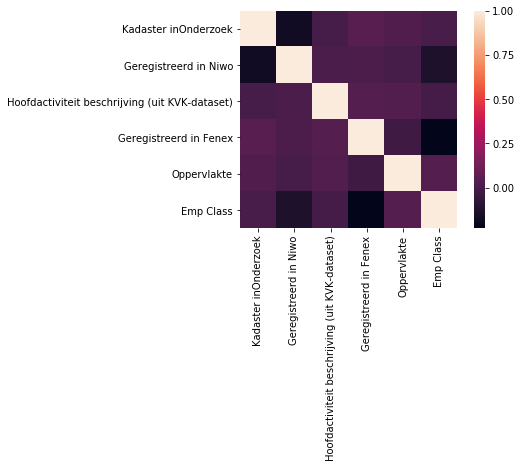

In [157]:
sns.heatmap(cor, square = True)

In [169]:
X, labels_true = make_blobs(n_samples=750, centers=corr_cluster, cluster_std=0.4,
                            random_state=0)

In [170]:
X = StandardScaler().fit_transform(corr_cluster)

In [171]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [172]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [184]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
unique_labels = set(labels)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print(unique_labels)

Estimated number of clusters: 47
Estimated number of noise points: 1154
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, -1}


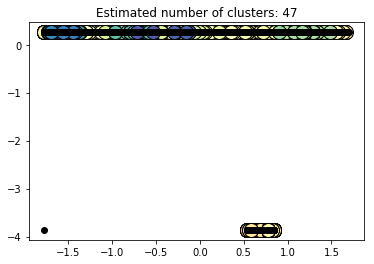

In [185]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Map ipv encoding

In [89]:
cluster_df['Gebruiksdoel'] = cluster_df['Gebruiksdoel'].map({'woonfunctie' : 0, 'industriefunctie' : 1, 'kantoorfunctie' : 2, 'overige gebruiksfunctie' : 3, 'winkelfunctie' : 4, 'bijeenkomstfunctie' : 5, 'logiesfunctie': 6, 'onderwijsfunctie': 7, 'gezondheidszorgfunctie': 8, 'sportfunctie' :9, 'celfunctie': 10})

C:\Users\doort\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
cluster_df

,Hoofdactiviteit beschrijving (uit KVK-dataset),Geregistreerd in Fenex,Oppervlakte,Emp Class,Kadaster inOnderzoek,Gebruiksdoel,Verblijfsobject status,Registration Date in KVK,Geregistreerd in Niwo
0,92,1,503.0,6.0,0,kantoorfunctie,in gebruik,9/1/1981,0
1,49,1,261.0,4.0,246,woonfunctie,in gebruik (niet ingemeten),6/6/1988,1
2,68,1,96.0,3.0,246,industriefunctie,in gebruik,10/21/1982,1
3,49,1,1818.0,8.0,246,kantoorfunctie,in gebruik,1/8/1990,1
4,92,1,760.0,6.0,246,kantoorfunctie,in gebruik,1/24/1983,0
5,49,1,513.0,5.0,246,winkelfunctie,in gebruik,9/2/2018,0
6,49,1,181.0,2.0,246,industriefunctie,in gebruik,1/6/1994,1
7,92,1,5876.0,5.0,246,kantoorfunctie,in gebruik,12/5/1938,0
8,49,1,160.0,3.0,246,woonfunctie,in gebruik (niet ingemeten),12/15/2004,0
9,92,1,170.0,3.0,246,woonfunctie,in gebruik,2/1/2017,0


# Troep

In [12]:
cluster_df['Geregistreerd in Fenex'].value_counts()

Nee    6186
Ja      343
Name: Geregistreerd in Fenex, dtype: int64

In [ ]:
cluster_df['Verblijfsobject status'].value_counts()

In [15]:
cluster_df.head()

,Hoofdactiviteit beschrijving (uit KVK-dataset),Geregistreerd in Fenex,Oppervlakte,Kadaster inOnderzoek,Gebruiksdoel,Verblijfsobject status,Registration Date in KVK,Geregistreerd in Niwo
0,Goederenvervoer over weg (geen verhuiz.),NaN,503.0,False,kantoorfunctie,in gebruik,9/1/1981,Ja
1,Expediteurs/cargadoors/bevrachters e.d.,NaN,261.0,False,woonfunctie,in gebruik (niet ingemeten),6/6/1988,Nee
2,GH ijzer-/staalschroot/oude non.ferrom.,NaN,96.0,False,industriefunctie,in gebruik,10/21/1982,Nee
3,Expediteurs/cargadoors/bevrachters e.d.,NaN,1818.0,False,kantoorfunctie,in gebruik,1/8/1990,Nee
4,Goederenvervoer over weg (geen verhuiz.),NaN,760.0,False,kantoorfunctie,in gebruik,1/24/1983,Ja


In [ ]:
hoofd = df['Hoofdactiviteit beschrijving (uit KVK-dataset)'].value_counts().sort_values()

In [ ]:
fig=hoofd.plot(kind='bar',logy=True, grid=True, figsize= (15,8));

In [9]:
df.mean()

Behkn                            2.272308e+01
CBS                              7.407165e+02
Code Hoofd activiteit            4.486369e+04
Vreemd gebruiksdoel              9.725839e-01
Expediteurs                      1.000000e+00
Expediteurs in onderzoek         7.658141e-04
Code (KWP)                       2.907283e+00
DOSSIER (SBI)                    4.003677e+07
KVK-nummer                       4.002506e+07
Gemeentenummer corespondentie    7.353780e+02
Gemeentenummer vestiging         7.407165e+02
Geokn                            2.268448e+01
Huisnummer corospendentie        2.247439e+03
Huisnummer vestiging             1.193494e+02
KvK NR.(wat houdt dit in?)       2.272308e+01
Neven activiteit 1               4.103632e+04
Neven actviteit 2                3.876343e+04
Non Mailing Indicator            3.570225e-01
Number of Records                1.000000e+00
Rechtsvormen                     3.328595e+01
VGNUMMER (kvk!sbi!codes)         2.214801e+07
Volgnummer                       2

In [10]:
df.median()

Behkn                            2.400000e+01
CBS                              5.990000e+02
Code Hoofd activiteit            5.229100e+04
Vreemd gebruiksdoel              1.000000e+00
Expediteurs                      1.000000e+00
Expediteurs in onderzoek         0.000000e+00
Code (KWP)                       2.000000e+00
DOSSIER (SBI)                    3.406678e+07
KVK-nummer                       3.406753e+07
Gemeentenummer corespondentie    5.990000e+02
Gemeentenummer vestiging         5.990000e+02
Geokn                            2.400000e+01
Huisnummer corospendentie        3.700000e+01
Huisnummer vestiging             2.300000e+01
KvK NR.(wat houdt dit in?)       2.400000e+01
Neven activiteit 1               5.229100e+04
Neven actviteit 2                5.210900e+04
Non Mailing Indicator            0.000000e+00
Number of Records                1.000000e+00
Rechtsvormen                     4.100000e+01
VGNUMMER (kvk!sbi!codes)         1.947988e+07
Volgnummer                       1